In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data set ###

In [242]:
df = pd.read_csv("urban_total.csv")
df.drop(["Indicator Name","Indicator Code","Unnamed: 65"],axis=1,inplace=True)
df.dropna(inplace=True)
country_name_to_country_code = dict([i for i in zip(df["Country Name"],df["Country Code"])])
df.drop("Country Code",inplace=True,axis=1)
df.set_index("Country Name",inplace=True)
df = df.T

In [244]:
df.head()

Country Name,Aruba,Africa Eastern and Southern,Afghanistan,Africa Western and Central,Angola,Albania,Andorra,Arab World,United Arab Emirates,Argentina,...,British Virgin Islands,Virgin Islands (U.S.),Vietnam,Vanuatu,World,Samoa,Yemen Rep.,South Africa,Zambia,Zimbabwe
1960,27525.0,19239140.0,755835.0,14141671.0,569223.0,493982.0,7838.0,28797167.0,67926.0,15076844.0,...,985.0,18355.0,4802497.0,6626.0,1.019030e+09,20559.0,483697.0,7971773.0,557193.0,476164.0
1961,28139.0,20049454.0,796271.0,14813809.0,597286.0,513592.0,8768.0,30292838.0,74979.0,15449953.0,...,1030.0,19847.0,5060353.0,6953.0,1.047559e+09,21286.0,510127.0,8200255.0,599672.0,500665.0
1962,28537.0,20897622.0,839385.0,15527606.0,628376.0,530766.0,9760.0,31856706.0,84362.0,15815495.0,...,1083.0,20734.0,5330493.0,7298.0,1.079414e+09,22067.0,538117.0,8427007.0,645119.0,528409.0
1963,28763.0,21807831.0,885227.0,16290977.0,660175.0,547928.0,10808.0,33513054.0,95215.0,16183088.0,...,1137.0,24120.0,5613231.0,7659.0,1.114226e+09,22883.0,567679.0,8662568.0,695944.0,567387.0
1964,28922.0,22780115.0,934134.0,17102150.0,691526.0,565248.0,11913.0,35275352.0,106186.0,16552518.0,...,1198.0,25276.0,5908339.0,8032.0,1.149871e+09,23708.0,598799.0,8906583.0,762426.0,609177.0


<AxesSubplot:>

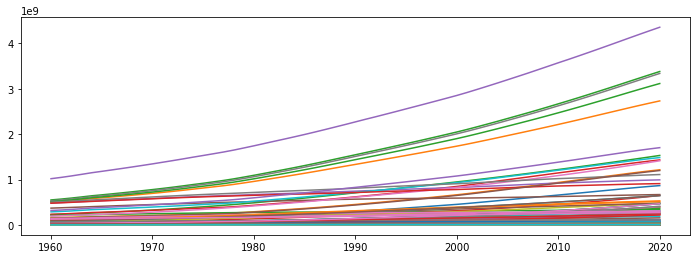

In [245]:
df.plot(figsize=(12,4),legend=False)

## Choropleth

In [294]:
df = df.T

In [277]:
d = {}
for yr in df.columns:
    df_temp = pd.DataFrame(df[yr])
    df_temp.rename(columns={yr:"Urban Pop"},inplace=True)
    df_temp["Year"] = int(yr)
    df_temp.reset_index(inplace=True)
    df_temp["Country Code"] = df_temp["Country Name"].apply(lambda x: country_name_to_country_code[x])
    d[yr] = df_temp
d[yr].head()

,Country Name,Urban Pop,Year,Country Code
0,Aruba,46654.0,2020,ABW
1,Africa Eastern and Southern,249112475.0,2020,AFE
2,Afghanistan,10131490.0,2020,AFG
3,Africa Western and Central,219531155.0,2020,AFW
4,Angola,21962884.0,2020,AGO


In [279]:
dfs = [d[yr] for yr in d]

In [280]:
df_big = pd.concat(dfs)

In [287]:
df_big["Urban Pop Log Scaled"] = np.log(df_big["Urban Pop"])

In [293]:
import plotly.express as px

df1 = px.data.gapminder().query("year==2007")
fig = px.choropleth(df_big, locations="Country Code",
                    color="Urban Pop Log Scaled", # lifeExp is a column of gapminder
                    hover_name="Country Name", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma,
                   animation_frame="Year")


fig.show()